In [1]:
import sys
sys.path.append('..')

In [2]:
# |hide
from nbdev.showdoc import *
from fastcore.test import test_eq
import lovely_tensors as lt

/home/amidemo/devel/anaconda3/envs/openmmlab-latest/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# |hide
lt.monkey_patch()

In [4]:
# |export
# |hide
from PIL import Image
import torch

from lovely_numpy.utils.pad import pad_frame_gutters
from lovely_numpy.utils.tile2d import hypertile
from lovely_numpy import rgb as np_rgb

In [5]:
# |export
def rgb(t: torch.Tensor, # Tensor to display. [[...], C,H,W] or [[...], H,W,C]
            denorm=None, # Reverse per-channel normalizatoin
            cl=False,    # Channel-last
            gutter_px = 3,  # If more than one tensor -> tile with this gutter width
            frame_px=1,  # If more than one tensor -> tile with this frame width
            scale=1,
            view_width=966): # targer width of the image
     
    return np_rgb(t.detach().cpu().numpy(),
                    denorm=denorm, cl=cl, gutter_px=gutter_px,
                    frame_px=frame_px, scale=scale,
                    view_width=view_width)

In [6]:
# |exporti

# This is here for the monkey-patched tensor use case.

# I want to be able to call both `tensor.rgb` and `tensor.rgb(stats)`. For the
# first case, the class defines `_repr_png_` to send the image to Jupyter. For
# the later case, it defines __call__, which accps the argument.

class RGBProxy():
    """Flexible `PIL.Image.Image` wrapper"""
    
    def __init__(self, t:torch.Tensor):
        assert t.ndim >= 3, f"Expecting at least 3 dimensions, got shape{t.shape}={t.dim()}"
        self.t = t

    def __call__(   self,
                    denorm=None,
                    cl=False,
                    gutter_px=3, frame_px=1,
                    scale=1,
                    view_width=966):

        return rgb(self.t, denorm=denorm, cl=cl, gutter_px=gutter_px,
                frame_px=frame_px, view_width=view_width, scale=scale)
    
    def _repr_png_(self):
        # Note: In order to prevernt IPYthon from hogging memory, we
        # delete the reference to the tensor after the first call to
        # `_repr_png_`. This is fine for Jupyter use.
        return self.__call__()._repr_png_()

     

In [10]:
# |hide 
image = torch.load("mysteryman.pt")

UnpicklingError: invalid load key, '\x0a'.

In [16]:
from lightning.data.datasets import DirtyMNIST
from torchvision.transforms import Resize

In [29]:
dataset = DirtyMNIST(root='/media/amidemo/Data/object_classifier_data/datasets',
                             train=True, dirty_probability=0.1,
                             use_cached_dataset=True, dirtiness_source='emnist-l')

Loading from /media/amidemo/Data/object_classifier_data/datasets/DirtyMNIST/dirty_mnist_emnist-l_trainval_dp-0.1_limits0.1-0.5-data.pt


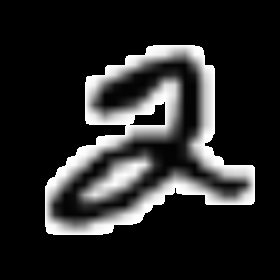

In [39]:
rgb(Resize(28 * 10)(torch.unsqueeze(dataset.data[5], dim=0).repeat(3, 1, 1)))

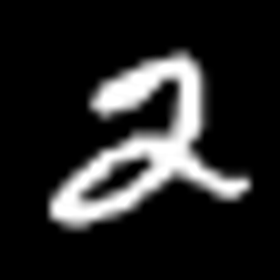

In [50]:
idx = torch.where(dataset.dirty_samples == True)[0][7]
dataset.get_pil_image(dataset.data[5]).resize((280,280))

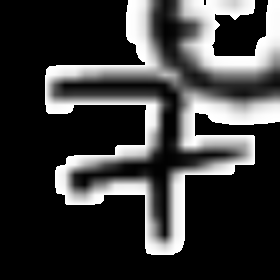

In [34]:
idx = torch.where(dataset.dirty_samples == True)[0][7]
rgb(Resize(28 * 10)(torch.unsqueeze(dataset.data[idx], dim=0).repeat(3, 1, 1)))

In [ ]:
from mat